In [52]:
#Install required packages for Association Rules
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
#Import basic libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder 

In [54]:
#QUESTION NO.1
book1= pd.read_csv("book.csv",encoding='latin1' )
book1 

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
5            1         0        0         0       0       1        0   
6            0         1        0         0       0       0        0   
7            0         1        0         0       1       0        0   
8            1         0        0         1       0       0        0   
9            1         1        1         0       0       0        1   
10           0         0        0         0       0       0        0   
11           0         0        1         0       0       0        1   
12           1         0        0         0       0       1        0   
13           1         1        0         1       1       1        0   
14           1         1        1         0       0       0        0   
15           1         1        1         0       0       0        1   
16           0         0        1         0       0       0        0   
17           0         0        1         0       0       0        0   
18           1         1        1         1       1       1        1   
19           1         1        1         0       0       1        0   
20           0         1        0         0       0       0        0   
21           1         0        0         0       0       0        0   
22           0         0        0         0       0       0        0   
23           0         0        1         0       0       0        1   
24           0         0        1         0       0       0        0   
25           0         1        1         1       0       1        1   
26           1         0        1         1       1       0        1   
27           0         0        0         0       0       0        0   
28           1         0        1         0       1       1        1   
29           0         0        1         0       0       0        0   
30           1         1        0         0       0       0        1   
31           0         0        0         0       0       0        0   
32           0         0        1         1       0       1        0   
33           0         0        1         1       0       0        1   
34           0         0        0         0       0       0        0   
35           1         1        1         0       1       1        1   
36           0         0        1         0       0       0        0   
37           0         0        0         1       0       0        0   
38           0         0        1         0       0       0        0   
39           0         0        0         0       0       0        0   
40           1         0        1         1       1       0        1   
41           0         0        0         1       0       0        0   
42           1         0        1         1       0       1        0   
43           1         1        0         1       1       1        0   
44           0         0        0         0       0       1        0   
45           0         0        0         0       0       0        0   
46           1         0        1         0       0       0        0   
47           1         0        0         0       0       0        0   
48           1         1        1         1       1       1        1   
49           0         0        0         0       0       0        0   
50           1         0        1         1       0       1        0   
51           0         0        0         0       0       0        0   
52           1         0        1         1       1       1        1   
53           0         0        0         0       0       0        0   
54           1         0        1         0   

In [55]:
pd.set_option("display.max_rows",None)
book1  

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
5            1         0        0         0       0       1        0   
6            0         1        0         0       0       0        0   
7            0         1        0         0       1       0        0   
8            1         0        0         1       0       0        0   
9            1         1        1         0       0       0        1   
10           0         0        0         0       0       0        0   
11           0         0        1         0       0       0        1   
12           1         0        0         0       0       1        0   
13           1         1        0         1       1       1        0   
14           1         1        1         0       0       0        0   
15           1         1        1         0       0       0        1   
16           0         0        1         0       0       0        0   
17           0         0        1         0       0       0        0   
18           1         1        1         1       1       1        1   
19           1         1        1         0       0       1        0   
20           0         1        0         0       0       0        0   
21           1         0        0         0       0       0        0   
22           0         0        0         0       0       0        0   
23           0         0        1         0       0       0        1   
24           0         0        1         0       0       0        0   
25           0         1        1         1       0       1        1   
26           1         0        1         1       1       0        1   
27           0         0        0         0       0       0        0   
28           1         0        1         0       1       1        1   
29           0         0        1         0       0       0        0   
30           1         1        0         0       0       0        1   
31           0         0        0         0       0       0        0   
32           0         0        1         1       0       1        0   
33           0         0        1         1       0       0        1   
34           0         0        0         0       0       0        0   
35           1         1        1         0       1       1        1   
36           0         0        1         0       0       0        0   
37           0         0        0         1       0       0        0   
38           0         0        1         0       0       0        0   
39           0         0        0         0       0       0        0   
40           1         0        1         1       1       0        1   
41           0         0        0         1       0       0        0   
42           1         0        1         1       0       1        0   
43           1         1        0         1       1       1        0   
44           0         0        0         0       0       1        0   
45           0         0        0         0       0       0        0   
46           1         0        1         0       0       0        0   
47           1         0        0         0       0       0        0   
48           1         1        1         1       1       1        1   
49           0         0        0         0       0       0        0   
50           1         0        1         1       0       1        0   
51           0         0        0         0       0       0        0   
52           1         0        1         1       1       1        1   
53           0         0        0         0       0       0        0   
54           1         0        1         0   

In [56]:
book1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [57]:
#Pre-Processing
#As the data is not in transaction formation We are using transaction Encoder
book= pd.get_dummies(book1)
book

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
5            1         0        0         0       0       1        0   
6            0         1        0         0       0       0        0   
7            0         1        0         0       1       0        0   
8            1         0        0         1       0       0        0   
9            1         1        1         0       0       0        1   
10           0         0        0         0       0       0        0   
11           0         0        1         0       0       0        1   
12           1         0        0         0       0       1        0   
13           1         1        0         1       1       1        0   
14           1         1        1         0       0       0        0   
15           1         1        1         0       0       0        1   
16           0         0        1         0       0       0        0   
17           0         0        1         0       0       0        0   
18           1         1        1         1       1       1        1   
19           1         1        1         0       0       1        0   
20           0         1        0         0       0       0        0   
21           1         0        0         0       0       0        0   
22           0         0        0         0       0       0        0   
23           0         0        1         0       0       0        1   
24           0         0        1         0       0       0        0   
25           0         1        1         1       0       1        1   
26           1         0        1         1       1       0        1   
27           0         0        0         0       0       0        0   
28           1         0        1         0       1       1        1   
29           0         0        1         0       0       0        0   
30           1         1        0         0       0       0        1   
31           0         0        0         0       0       0        0   
32           0         0        1         1       0       1        0   
33           0         0        1         1       0       0        1   
34           0         0        0         0       0       0        0   
35           1         1        1         0       1       1        1   
36           0         0        1         0       0       0        0   
37           0         0        0         1       0       0        0   
38           0         0        1         0       0       0        0   
39           0         0        0         0       0       0        0   
40           1         0        1         1       1       0        1   
41           0         0        0         1       0       0        0   
42           1         0        1         1       0       1        0   
43           1         1        0         1       1       1        0   
44           0         0        0         0       0       1        0   
45           0         0        0         0       0       0        0   
46           1         0        1         0       0       0        0   
47           1         0        0         0       0       0        0   
48           1         1        1         1       1       1        1   
49           0         0        0         0       0       0        0   
50           1         0        1         1       0       1        0   
51           0         0        0         0       0       0        0   
52           1         0        1         1       1       1        1   
53           0         0        0         0       0       0        0   
54           1         0        1         0   

####APRIORI ALGORITHM:-
####If support value=0.1 & threshold value=0.7

In [58]:
# Apriori Algorithm
frequent_itemsets= apriori(book,min_support=0.1,use_colnames=True) 
frequent_itemsets 

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (ChildBks, YouthBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (ChildBks, DoItYBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (CookBks, YouthBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525              (CookBks, RefBks)
21   0.1670              (CookBks, ArtBks)
22   0.1925             (CookBks, GeogBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (DoItYBks, RefBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (GeogBks, DoItYBks)
27   0.1105              (GeogBks, RefBks)
28   0.1275              (GeogBks, ArtBks)
29   0.1290  (ChildBks, CookBks, YouthBks)
30   0.1460  (ChildBks, CookBks, DoItYBks)
31   0.1225    (ChildBks, CookBks, RefBks)
32   0.1265    (ChildBks, CookBks, ArtBks)
33   0.1495   (ChildBks, CookBks, GeogBks)
34   0.1045  (ChildBks, GeogBks, DoItYBks)
35   0.1020    (ChildBks, GeogBks, ArtBks)
36   0.1015    (CookBks, ArtBks, DoItYBks)
37   0.1085   (CookBks, GeogBks, DoItYBks)
38   0.1035     (CookBks, GeogBks, ArtBks)

In [59]:
# An leverage value is more closer to 0 indicates independence. Range will be [-1 to 1], when leverage value is away from 0 indicates dependence b/w items
# A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf] ie; better association
# min_threshold= min. lift ratio= 0.7
# If lift ratio is very close of two same antecedent & consequent items then select better association rule based on confidence[confidence= higher]
# If lift ratio is same of two rule then select better association rule based on confidence[confidence= higher]

rules= association_rules(frequent_itemsets, metric="lift",min_threshold=0.7)
rules 

antecedents           consequents  antecedent support  \
0             (ChildBks)            (YouthBks)              0.4230   
1             (YouthBks)            (ChildBks)              0.2475   
2             (ChildBks)             (CookBks)              0.4230   
3              (CookBks)            (ChildBks)              0.4310   
4             (ChildBks)            (DoItYBks)              0.4230   
5             (DoItYBks)            (ChildBks)              0.2820   
6             (ChildBks)              (RefBks)              0.4230   
7               (RefBks)            (ChildBks)              0.2145   
8             (ChildBks)              (ArtBks)              0.4230   
9               (ArtBks)            (ChildBks)              0.2410   
10            (ChildBks)             (GeogBks)              0.4230   
11             (GeogBks)            (ChildBks)              0.2760   
12             (CookBks)            (YouthBks)              0.4310   
13            (YouthBks)             (CookBks)              0.2475   
14            (DoItYBks)            (YouthBks)              0.2820   
15            (YouthBks)            (DoItYBks)              0.2475   
16              (ArtBks)            (YouthBks)              0.2410   
17            (YouthBks)              (ArtBks)              0.2475   
18             (GeogBks)            (YouthBks)              0.2760   
19            (YouthBks)             (GeogBks)              0.2475   
20             (CookBks)            (DoItYBks)              0.4310   
21            (DoItYBks)             (CookBks)              0.2820   
22             (CookBks)              (RefBks)              0.4310   
23              (RefBks)             (CookBks)              0.2145   
24             (CookBks)              (ArtBks)              0.4310   
25              (ArtBks)             (CookBks)              0.2410   
26             (CookBks)             (GeogBks)              0.4310   
27             (GeogBks)             (CookBks)              0.2760   
28             (CookBks)            (ItalCook)              0.4310   
29            (ItalCook)             (CookBks)              0.1135   
30            (DoItYBks)              (RefBks)              0.2820   
31              (RefBks)            (DoItYBks)              0.2145   
32              (ArtBks)            (DoItYBks)              0.2410   
33            (DoItYBks)              (ArtBks)              0.2820   
34             (GeogBks)            (DoItYBks)              0.2760   
35            (DoItYBks)             (GeogBks)              0.2820   
36             (GeogBks)              (RefBks)              0.2760   
37              (RefBks)             (GeogBks)              0.2145   
38             (GeogBks)              (ArtBks)              0.2760   
39              (ArtBks)             (GeogBks)              0.2410   
40   (ChildBks, CookBks)            (YouthBks)              0.2560   
41  (ChildBks, YouthBks)             (CookBks)              0.1650   
42   (CookBks, YouthBks)            (ChildBks)              0.1620   
43            (ChildBks)   (CookBks, YouthBks)              0.4230   
44             (CookBks)  (ChildBks, YouthBks)              0.4310   
45            (YouthBks)   (ChildBks, CookBks)              0.2475   
46   (ChildBks, CookBks)            (DoItYBks)              0.2560   
47  (ChildBks, DoItYBks)             (CookBks)              0.1840   
48   (CookBks, DoItYBks)            (ChildBks)              0.1875   
49            (ChildBks)   (CookBks, DoItYBks)              0.4230   
50             (CookBks)  (ChildBks, DoItYBks)              0.4310   
51            (DoItYBks)   (ChildBks, CookBks)              0.2820   
52   (ChildBks, CookBks)              (RefBks)              0.2560   
53    (ChildBks, RefBks)             (CookBks)              0.1515   
54     (CookBks, RefBks)            (ChildBks)              0.1525   
55            (ChildBks)     (CookBks, RefBks)              0.4230   
56             (CookBks

In [60]:
rules.sort_values('lift',ascending= False).head(10)

antecedents          consequents  antecedent support  \
28            (CookBks)           (ItalCook)              0.4310   
29           (ItalCook)            (CookBks)              0.1135   
77   (ChildBks, ArtBks)            (GeogBks)              0.1625   
80            (GeogBks)   (ChildBks, ArtBks)              0.2760   
86             (ArtBks)  (CookBks, DoItYBks)              0.2410   
83  (CookBks, DoItYBks)             (ArtBks)              0.1875   
98            (GeogBks)    (CookBks, ArtBks)              0.2760   
95    (CookBks, ArtBks)            (GeogBks)              0.1670   
99             (ArtBks)   (CookBks, GeogBks)              0.2410   
94   (CookBks, GeogBks)             (ArtBks)              0.1925   

    consequent support  support  confidence      lift  leverage  conviction  
28              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
29              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
77              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
80              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
86              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
83              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797  
98              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
95              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
99              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
94              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657

In [61]:
rules.sort_values('lift',ascending= False)[0:20] 

antecedents          consequents  antecedent support  \
28            (CookBks)           (ItalCook)              0.4310   
29           (ItalCook)            (CookBks)              0.1135   
77   (ChildBks, ArtBks)            (GeogBks)              0.1625   
80            (GeogBks)   (ChildBks, ArtBks)              0.2760   
86             (ArtBks)  (CookBks, DoItYBks)              0.2410   
83  (CookBks, DoItYBks)             (ArtBks)              0.1875   
98            (GeogBks)    (CookBks, ArtBks)              0.2760   
95    (CookBks, ArtBks)            (GeogBks)              0.1670   
99             (ArtBks)   (CookBks, GeogBks)              0.2410   
94   (CookBks, GeogBks)             (ArtBks)              0.1925   
52  (ChildBks, CookBks)             (RefBks)              0.2560   
57             (RefBks)  (ChildBks, CookBks)              0.2145   
76  (ChildBks, GeogBks)             (ArtBks)              0.1950   
81             (ArtBks)  (ChildBks, GeogBks)              0.2410   
87           (DoItYBks)    (CookBks, ArtBks)              0.2820   
82    (CookBks, ArtBks)           (DoItYBks)              0.1670   
64  (ChildBks, CookBks)            (GeogBks)              0.2560   
69            (GeogBks)  (ChildBks, CookBks)              0.2760   
89  (CookBks, DoItYBks)            (GeogBks)              0.1875   
92            (GeogBks)  (CookBks, DoItYBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
28              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
29              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
77              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
80              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
86              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
83              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797  
98              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
95              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
99              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
94              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
52              0.2145   0.1225    0.478516  2.230842  0.067588    1.506277  
57              0.2560   0.1225    0.571096  2.230842  0.067588    1.734652  
76              0.2410   0.1020    0.523077  2.170444  0.055005    1.591452  
81              0.1950   0.1020    0.423237  2.170444  0.055005    1.395719  
87              0.1670   0.1015    0.359929  2.155264  0.054406    1.301418  
82              0.2820   0.1015    0.607784  2.155264  0.054406    1.830626  
64              0.2760   0.1495    0.583984  2.115885  0.078844    1.740319  
69              0.2560   0.1495    0.541667  2.115885  0.078844    1.623273  
89              0.2760   0.1085    0.578667  2.096618  0.056750    1.718354  
92              0.1875   0.1085    0.393116  2.096618  0.056750    1.338806

In [62]:
#Lift ratio > 1 indicates the association rule is important
rules[rules.lift>1] 

antecedents           consequents  antecedent support  \
0             (ChildBks)            (YouthBks)              0.4230   
1             (YouthBks)            (ChildBks)              0.2475   
2             (ChildBks)             (CookBks)              0.4230   
3              (CookBks)            (ChildBks)              0.4310   
4             (ChildBks)            (DoItYBks)              0.4230   
5             (DoItYBks)            (ChildBks)              0.2820   
6             (ChildBks)              (RefBks)              0.4230   
7               (RefBks)            (ChildBks)              0.2145   
8             (ChildBks)              (ArtBks)              0.4230   
9               (ArtBks)            (ChildBks)              0.2410   
10            (ChildBks)             (GeogBks)              0.4230   
11             (GeogBks)            (ChildBks)              0.2760   
12             (CookBks)            (YouthBks)              0.4310   
13            (YouthBks)             (CookBks)              0.2475   
14            (DoItYBks)            (YouthBks)              0.2820   
15            (YouthBks)            (DoItYBks)              0.2475   
16              (ArtBks)            (YouthBks)              0.2410   
17            (YouthBks)              (ArtBks)              0.2475   
18             (GeogBks)            (YouthBks)              0.2760   
19            (YouthBks)             (GeogBks)              0.2475   
20             (CookBks)            (DoItYBks)              0.4310   
21            (DoItYBks)             (CookBks)              0.2820   
22             (CookBks)              (RefBks)              0.4310   
23              (RefBks)             (CookBks)              0.2145   
24             (CookBks)              (ArtBks)              0.4310   
25              (ArtBks)             (CookBks)              0.2410   
26             (CookBks)             (GeogBks)              0.4310   
27             (GeogBks)             (CookBks)              0.2760   
28             (CookBks)            (ItalCook)              0.4310   
29            (ItalCook)             (CookBks)              0.1135   
30            (DoItYBks)              (RefBks)              0.2820   
31              (RefBks)            (DoItYBks)              0.2145   
32              (ArtBks)            (DoItYBks)              0.2410   
33            (DoItYBks)              (ArtBks)              0.2820   
34             (GeogBks)            (DoItYBks)              0.2760   
35            (DoItYBks)             (GeogBks)              0.2820   
36             (GeogBks)              (RefBks)              0.2760   
37              (RefBks)             (GeogBks)              0.2145   
38             (GeogBks)              (ArtBks)              0.2760   
39              (ArtBks)             (GeogBks)              0.2410   
40   (ChildBks, CookBks)            (YouthBks)              0.2560   
41  (ChildBks, YouthBks)             (CookBks)              0.1650   
42   (CookBks, YouthBks)            (ChildBks)              0.1620   
43            (ChildBks)   (CookBks, YouthBks)              0.4230   
44             (CookBks)  (ChildBks, YouthBks)              0.4310   
45            (YouthBks)   (ChildBks, CookBks)              0.2475   
46   (ChildBks, CookBks)            (DoItYBks)              0.2560   
47  (ChildBks, DoItYBks)             (CookBks)              0.1840   
48   (CookBks, DoItYBks)            (ChildBks)              0.1875   
49            (ChildBks)   (CookBks, DoItYBks)              0.4230   
50             (CookBks)  (ChildBks, DoItYBks)              0.4310   
51            (DoItYBks)   (ChildBks, CookBks)              0.2820   
52   (ChildBks, CookBks)              (RefBks)              0.2560   
53    (ChildBks, RefBks)             (CookBks)              0.1515   
54     (CookBks, RefBks)            (ChildBks)              0.1525   
55            (ChildBks)     (CookBks, RefBks)              0.4230   
56             (CookBks

####Visualizing the Association Rule by Scatter plot

In [63]:
#Visualizing the Association Rule by Scatter plot
import matplotlib.pyplot as plt

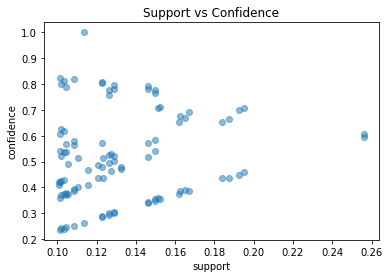

In [64]:
#Support Vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

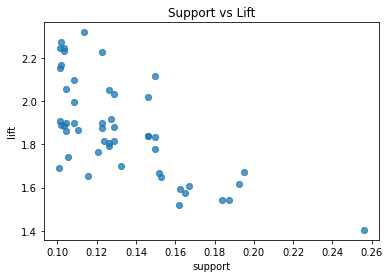

In [65]:
#Support Vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

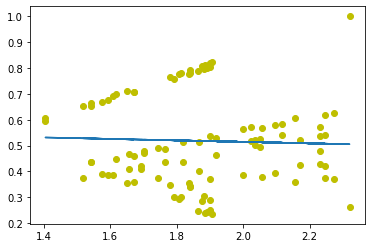

In [66]:
#Lift Vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

####APRIORI ALGORITHM:-
####If support value=0.2 & threshold value=1

In [67]:
# Apriori Algorithm
frequent_itemsets= apriori(book,min_support=0.2,use_colnames=True) 
frequent_itemsets 

support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (ChildBks, CookBks)

In [68]:
# An leverage value is more closer to 0 indicates independence. Range will be [-1 to 1], when leverage value is away from 0 indicates dependence b/w items
# A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf] ie; better association
# min_threshold= min. lift ratio= 1
# If lift ratio is very close of two same antecedent & consequent items then select better association rule based on confidence[confidence= higher]
# If lift ratio is same of two rule then select better association rule based on confidence[confidence= higher]

rules= association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules 

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

In [69]:
rules.sort_values('lift',ascending= False).head(10)

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

In [70]:
rules.sort_values('lift',ascending= False)[0:20] 

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

In [71]:
#Lift ratio > 1 indicates the association rule is important
rules[rules.lift>1] 

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

####Visualizing the Association Rule by Scatter plot

In [72]:
#Visualizing the Association Rule by Scatter plot
import matplotlib.pyplot as plt

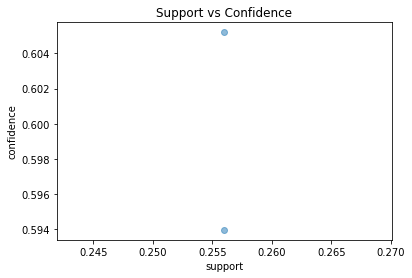

In [73]:
#Support Vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

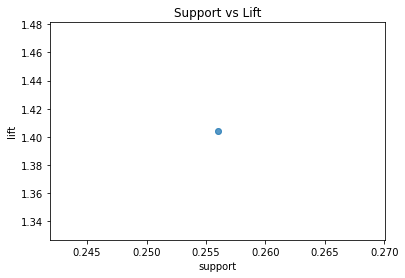

In [74]:
#Support Vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


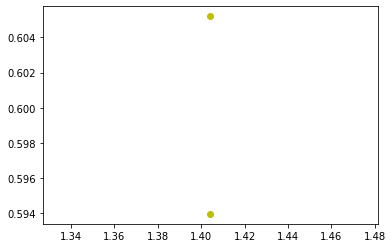

In [75]:
#Lift Vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [76]:
#QUESTION NO.2
movies1= pd.read_csv("my_movies.csv")
movies1  

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [77]:
#Pre-Processing
#As the data is not in transaction formation We are using transaction Encoder
movies= pd.get_dummies(movies1)
movies 

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  ...  V2_LOTR  V2_LOTR1  \
0              0     0           0           1  ...        0         1   
1              0     0           1           0  ...        0         0   
2              0     0           0           0  ...        0         0   
3              0     0           0           0  ...        0         0   
4              0     0           0           0  ...        0         0   
5              0     0           0           0  ...        0         0   
6              1     0           0           0  ...        0         0   
7              0     0           0           0  ...        0         0   
8              0     0           0           0  ...        0         0   
9              0     1           0           1  ...        1         0   

   V2_LOTR2  V2_Patriot  V3_Braveheart  V3_Gladiator  V3_Harry Potter1  \
0         0           0              0             0                 1   
1         0           1              1             0                 0   
2         1           0              0             0                 0   
3         0           1              0             0                 0   
4         0           1              0             0                 0   
5         0           1              0             0                 0   
6         0           0              0             0                 0   
7         0           1              0             0                 0   
8         0           1              0             0                 0   
9         0           0              0             1                 0   

   V3_Sixth Sense  V4_Green Mile  V5_LOTR2  
0               0              1         1  
1               0              0         0  
2               0              0         0  
3               1              0         0  
4               1              0         0  
5               1              0         0  
6               0              0         0  
7               0              0         0  
8               1              0         0  
9               0              1         0  

[10 rows x 25 columns]

####APRIORI ALGORITHM:-
####If support value=0.5 & threshold value=0.7

In [78]:
# Apriori Algorithm
frequent_itemsets= apriori(movies,min_support=0.5,use_colnames=True) 
frequent_itemsets 

support                                        itemsets
0       0.6                                   (Sixth Sense)
1       0.7                                     (Gladiator)
2       0.6                                       (Patriot)
3       0.6                                  (V1_Gladiator)
4       0.6                                    (V2_Patriot)
5       0.5                        (Sixth Sense, Gladiator)
6       0.6                            (Patriot, Gladiator)
7       0.6                       (Gladiator, V1_Gladiator)
8       0.6                         (V2_Patriot, Gladiator)
9       0.6                         (Patriot, V1_Gladiator)
10      0.6                           (Patriot, V2_Patriot)
11      0.6                      (V2_Patriot, V1_Gladiator)
12      0.6              (Patriot, Gladiator, V1_Gladiator)
13      0.6                (Patriot, V2_Patriot, Gladiator)
14      0.6           (V2_Patriot, Gladiator, V1_Gladiator)
15      0.6             (Patriot, V2_Patriot, V1_Gladiator)
16      0.6  (Patriot, V2_Patriot, Gladiator, V1_Gladiator)

In [79]:
# An leverage value is more closer to 0 indicates independence. Range will be [-1 to 1], when leverage value is away from 0 indicates dependence b/w items
# A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf] ie; better association
# min_threshold= min. lift ratio= 0.7
# If lift ratio is very close of two same antecedent & consequent items then select better association rule based on confidence[confidence= higher]
# If lift ratio is same of two rule then select better association rule based on confidence[confidence= higher]

rules= association_rules(frequent_itemsets, metric="lift",min_threshold=0.7)
rules 

antecedents  \
0                           (Sixth Sense)   
1                             (Gladiator)   
2                               (Patriot)   
3                             (Gladiator)   
4                             (Gladiator)   
5                          (V1_Gladiator)   
6                            (V2_Patriot)   
7                             (Gladiator)   
8                               (Patriot)   
9                          (V1_Gladiator)   
10                              (Patriot)   
11                           (V2_Patriot)   
12                           (V2_Patriot)   
13                         (V1_Gladiator)   
14                   (Patriot, Gladiator)   
15                (Patriot, V1_Gladiator)   
16              (Gladiator, V1_Gladiator)   
17                              (Patriot)   
18                            (Gladiator)   
19                         (V1_Gladiator)   
20                  (Patriot, V2_Patriot)   
21                   (Patriot, Gladiator)   
22                (V2_Patriot, Gladiator)   
23                              (Patriot)   
24                           (V2_Patriot)   
25                            (Gladiator)   
26                (V2_Patriot, Gladiator)   
27             (V2_Patriot, V1_Gladiator)   
28              (Gladiator, V1_Gladiator)   
29                           (V2_Patriot)   
30                            (Gladiator)   
31                         (V1_Gladiator)   
32                  (Patriot, V2_Patriot)   
33                (Patriot, V1_Gladiator)   
34             (V2_Patriot, V1_Gladiator)   
35                              (Patriot)   
36                           (V2_Patriot)   
37                         (V1_Gladiator)   
38       (Patriot, V2_Patriot, Gladiator)   
39    (Patriot, V2_Patriot, V1_Gladiator)   
40     (Patriot, Gladiator, V1_Gladiator)   
41  (V2_Patriot, Gladiator, V1_Gladiator)   
42                  (Patriot, V2_Patriot)   
43                   (Patriot, Gladiator)   
44                (Patriot, V1_Gladiator)   
45                (V2_Patriot, Gladiator)   
46             (V2_Patriot, V1_Gladiator)   
47              (Gladiator, V1_Gladiator)   
48                              (Patriot)   
49                           (V2_Patriot)   
50                            (Gladiator)   
51                         (V1_Gladiator)   

                              consequents  antecedent support  \
0                             (Gladiator)                 0.6   
1                           (Sixth Sense)                 0.7   
2                             (Gladiator)                 0.6   
3                               (Patriot)                 0.7   
4                          (V1_Gladiator)                 0.7   
5                             (Gladiator)                 0.6   
6                             (Gladiator)                 0.6   
7                            (V2_Patriot)                 0.7   
8                          (V1_Gladiator)                 0.6   
9                               (Patriot)                 0.6   
10                           (V2_Patriot)                 0.6   
11                              (Patriot)                 0.6   
12                         (V1_Gladiator)                 0.6   
13                           (V2_Patriot)                 0.6   
14                         (V1_Gladiator)                 0.6   
15                            (Gladiator)                 0.6   
16                              (Patriot)                 0.6   
17              (Gladiator, V1_Gladiator)                 0.6   
18                (Patriot, V1_Gladiator)                 0.7   
19                   (Patriot, Gladiator)                 0.6   
20                            (Gladiator)                 0.6   
21                           (V2_Patriot)                 0.6   
22                              (Patriot)                 0.6   
23                (V2_Patriot, Gladiator)                 0.6   
24                 

In [80]:
rules.sort_values('lift',ascending= False).head(10)

antecedents                 consequents  \
26           (V2_Patriot, Gladiator)              (V1_Gladiator)   
38  (Patriot, V2_Patriot, Gladiator)              (V1_Gladiator)   
28         (Gladiator, V1_Gladiator)                (V2_Patriot)   
29                      (V2_Patriot)   (Gladiator, V1_Gladiator)   
31                    (V1_Gladiator)     (V2_Patriot, Gladiator)   
32             (Patriot, V2_Patriot)              (V1_Gladiator)   
33           (Patriot, V1_Gladiator)                (V2_Patriot)   
34        (V2_Patriot, V1_Gladiator)                   (Patriot)   
35                         (Patriot)  (V2_Patriot, V1_Gladiator)   
36                      (V2_Patriot)     (Patriot, V1_Gladiator)   

    antecedent support  consequent support  support  confidence      lift  \
26                 0.6                 0.6      0.6         1.0  1.666667   
38                 0.6                 0.6      0.6         1.0  1.666667   
28                 0.6                 0.6      0.6         1.0  1.666667   
29                 0.6                 0.6      0.6         1.0  1.666667   
31                 0.6                 0.6      0.6         1.0  1.666667   
32                 0.6                 0.6      0.6         1.0  1.666667   
33                 0.6                 0.6      0.6         1.0  1.666667   
34                 0.6                 0.6      0.6         1.0  1.666667   
35                 0.6                 0.6      0.6         1.0  1.666667   
36                 0.6                 0.6      0.6         1.0  1.666667   

    leverage  conviction  
26      0.24         inf  
38      0.24         inf  
28      0.24         inf  
29      0.24         inf  
31      0.24         inf  
32      0.24         inf  
33      0.24         inf  
34      0.24         inf  
35      0.24         inf  
36      0.24         inf

In [81]:
rules.sort_values('lift',ascending= False)[0:20] 

antecedents                 consequents  \
26                (V2_Patriot, Gladiator)              (V1_Gladiator)   
38       (Patriot, V2_Patriot, Gladiator)              (V1_Gladiator)   
28              (Gladiator, V1_Gladiator)                (V2_Patriot)   
29                           (V2_Patriot)   (Gladiator, V1_Gladiator)   
31                         (V1_Gladiator)     (V2_Patriot, Gladiator)   
32                  (Patriot, V2_Patriot)              (V1_Gladiator)   
33                (Patriot, V1_Gladiator)                (V2_Patriot)   
34             (V2_Patriot, V1_Gladiator)                   (Patriot)   
35                              (Patriot)  (V2_Patriot, V1_Gladiator)   
36                           (V2_Patriot)     (Patriot, V1_Gladiator)   
37                         (V1_Gladiator)       (Patriot, V2_Patriot)   
40     (Patriot, Gladiator, V1_Gladiator)                (V2_Patriot)   
23                              (Patriot)     (V2_Patriot, Gladiator)   
41  (V2_Patriot, Gladiator, V1_Gladiator)                   (Patriot)   
42                  (Patriot, V2_Patriot)   (Gladiator, V1_Gladiator)   
43                   (Patriot, Gladiator)  (V2_Patriot, V1_Gladiator)   
44                (Patriot, V1_Gladiator)     (V2_Patriot, Gladiator)   
45                (V2_Patriot, Gladiator)     (Patriot, V1_Gladiator)   
46             (V2_Patriot, V1_Gladiator)        (Patriot, Gladiator)   
47              (Gladiator, V1_Gladiator)       (Patriot, V2_Patriot)   

    antecedent support  consequent support  support  confidence      lift  \
26                 0.6                 0.6      0.6         1.0  1.666667   
38                 0.6                 0.6      0.6         1.0  1.666667   
28                 0.6                 0.6      0.6         1.0  1.666667   
29                 0.6                 0.6      0.6         1.0  1.666667   
31                 0.6                 0.6      0.6         1.0  1.666667   
32                 0.6                 0.6      0.6         1.0  1.666667   
33                 0.6                 0.6      0.6         1.0  1.666667   
34                 0.6                 0.6      0.6         1.0  1.666667   
35                 0.6                 0.6      0.6         1.0  1.666667   
36                 0.6                 0.6      0.6         1.0  1.666667   
37                 0.6                 0.6      0.6         1.0  1.666667   
40                 0.6                 0.6      0.6         1.0  1.666667   
23                 0.6                 0.6      0.6         1.0  1.666667   
41                 0.6                 0.6      0.6         1.0  1.666667   
42                 0.6                 0.6      0.6         1.0  1.666667   
43                 0.6                 0.6      0.6         1.0  1.666667   
44                 0.6                 0.6      0.6         1.0  1.666667   
45                 0.6                 0.6      0.6         1.0  1.666667   
46                 0.6                 0.6      0.6         1.0  1.666667   
47                 0.6                 0.6      0.6         1.0  1.666667   

    leverage  conviction  
26      0.24         inf  
38      0.24         inf  
28      0.24         inf  
29      0.24         inf  
31      0.24         inf  
32      0.24         inf  
33      0.24         inf  
34      0.24         inf  
35      0.24         inf  
36      0.24         inf  
37      0.24         inf  
40      0.24         inf  
23      0.24         inf  
41      0.24         inf  
42      0.24         inf  
43      0.24         inf  
44      0.24         inf  
45      0.24         inf  
46      0.24         inf  
47      0.24         inf

In [82]:
#Lift ratio > 1 indicates the association rule is important
rules[rules.lift>1] 

antecedents  \
0                           (Sixth Sense)   
1                             (Gladiator)   
2                               (Patriot)   
3                             (Gladiator)   
4                             (Gladiator)   
5                          (V1_Gladiator)   
6                            (V2_Patriot)   
7                             (Gladiator)   
8                               (Patriot)   
9                          (V1_Gladiator)   
10                              (Patriot)   
11                           (V2_Patriot)   
12                           (V2_Patriot)   
13                         (V1_Gladiator)   
14                   (Patriot, Gladiator)   
15                (Patriot, V1_Gladiator)   
16              (Gladiator, V1_Gladiator)   
17                              (Patriot)   
18                            (Gladiator)   
19                         (V1_Gladiator)   
20                  (Patriot, V2_Patriot)   
21                   (Patriot, Gladiator)   
22                (V2_Patriot, Gladiator)   
23                              (Patriot)   
24                           (V2_Patriot)   
25                            (Gladiator)   
26                (V2_Patriot, Gladiator)   
27             (V2_Patriot, V1_Gladiator)   
28              (Gladiator, V1_Gladiator)   
29                           (V2_Patriot)   
30                            (Gladiator)   
31                         (V1_Gladiator)   
32                  (Patriot, V2_Patriot)   
33                (Patriot, V1_Gladiator)   
34             (V2_Patriot, V1_Gladiator)   
35                              (Patriot)   
36                           (V2_Patriot)   
37                         (V1_Gladiator)   
38       (Patriot, V2_Patriot, Gladiator)   
39    (Patriot, V2_Patriot, V1_Gladiator)   
40     (Patriot, Gladiator, V1_Gladiator)   
41  (V2_Patriot, Gladiator, V1_Gladiator)   
42                  (Patriot, V2_Patriot)   
43                   (Patriot, Gladiator)   
44                (Patriot, V1_Gladiator)   
45                (V2_Patriot, Gladiator)   
46             (V2_Patriot, V1_Gladiator)   
47              (Gladiator, V1_Gladiator)   
48                              (Patriot)   
49                           (V2_Patriot)   
50                            (Gladiator)   
51                         (V1_Gladiator)   

                              consequents  antecedent support  \
0                             (Gladiator)                 0.6   
1                           (Sixth Sense)                 0.7   
2                             (Gladiator)                 0.6   
3                               (Patriot)                 0.7   
4                          (V1_Gladiator)                 0.7   
5                             (Gladiator)                 0.6   
6                             (Gladiator)                 0.6   
7                            (V2_Patriot)                 0.7   
8                          (V1_Gladiator)                 0.6   
9                               (Patriot)                 0.6   
10                           (V2_Patriot)                 0.6   
11                              (Patriot)                 0.6   
12                         (V1_Gladiator)                 0.6   
13                           (V2_Patriot)                 0.6   
14                         (V1_Gladiator)                 0.6   
15                            (Gladiator)                 0.6   
16                              (Patriot)                 0.6   
17              (Gladiator, V1_Gladiator)                 0.6   
18                (Patriot, V1_Gladiator)                 0.7   
19                   (Patriot, Gladiator)                 0.6   
20                            (Gladiator)                 0.6   
21                           (V2_Patriot)                 0.6   
22                              (Patriot)                 0.6   
23                (V2_Patriot, Gladiator)                 0.6   
24                 

####Visualizing the Association Rule by Scatter plot

In [83]:
#Visualizing the Association Rule by Scatter plot
import matplotlib.pyplot as plt

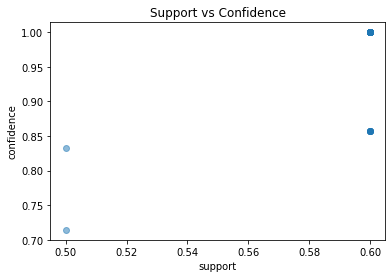

In [84]:
#Support Vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

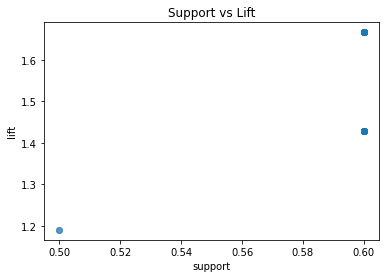

In [85]:
#Support Vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

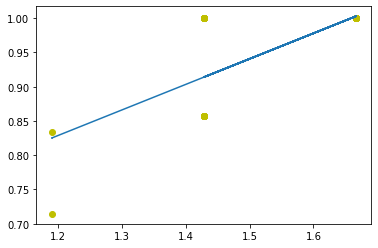

In [86]:
#Lift Vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift'])) 

####APRIORI ALGORITHM:-
####If support value=0.3 & threshold value=0.9

In [87]:
# Apriori Algorithm
frequent_itemsets= apriori(movies,min_support=0.3,use_colnames=True) 
frequent_itemsets 

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.6                                          (Patriot)
3       0.6                                     (V1_Gladiator)
4       0.6                                       (V2_Patriot)
5       0.4                                   (V3_Sixth Sense)
6       0.5                           (Sixth Sense, Gladiator)
7       0.4                             (Sixth Sense, Patriot)
8       0.4                        (Sixth Sense, V1_Gladiator)
9       0.4                          (Sixth Sense, V2_Patriot)
10      0.4                      (Sixth Sense, V3_Sixth Sense)
11      0.6                               (Patriot, Gladiator)
12      0.6                          (Gladiator, V1_Gladiator)
13      0.6                            (V2_Patriot, Gladiator)
14      0.4                        (V3_Sixth Sense, Gladiator)
15      0.6                            (Patriot, V1_Gladiator)
16      0.6                              (Patriot, V2_Patriot)
17      0.4                          (Patriot, V3_Sixth Sense)
18      0.6                         (V2_Patriot, V1_Gladiator)
19      0.4                     (V3_Sixth Sense, V1_Gladiator)
20      0.4                       (V2_Patriot, V3_Sixth Sense)
21      0.4                  (Sixth Sense, Patriot, Gladiator)
22      0.4             (Sixth Sense, Gladiator, V1_Gladiator)
23      0.4               (Sixth Sense, V2_Patriot, Gladiator)
24      0.4           (Sixth Sense, V3_Sixth Sense, Gladiator)
25      0.4               (Sixth Sense, Patriot, V1_Gladiator)
26      0.4                 (Sixth Sense, Patriot, V2_Patriot)
27      0.4             (Sixth Sense, Patriot, V3_Sixth Sense)
28      0.4            (Sixth Sense, V2_Patriot, V1_Gladiator)
29      0.4        (Sixth Sense, V3_Sixth Sense, V1_Gladiator)
30      0.4          (Sixth Sense, V2_Patriot, V3_Sixth Sense)
31      0.6                 (Patriot, Gladiator, V1_Gladiator)
32      0.6                   (Patriot, V2_Patriot, Gladiator)
33      0.4               (Patriot, V3_Sixth Sense, Gladiator)
34      0.6              (V2_Patriot, Gladiator, V1_Gladiator)
35      0.4          (V3_Sixth Sense, Gladiator, V1_Gladiator)
36      0.4            (V2_Patriot, V3_Sixth Sense, Gladiator)
37      0.6                (Patriot, V2_Patriot, V1_Gladiator)
38      0.4            (Patriot, V3_Sixth Sense, V1_Gladiator)
39      0.4              (Patriot, V2_Patriot, V3_Sixth Sense)
40      0.4         (V2_Patriot, V3_Sixth Sense, V1_Gladiator)
41      0.4    (Sixth Sense, Patriot, Gladiator, V1_Gladiator)
42      0.4      (Sixth Sense, Patriot, V2_Patriot, Gladiator)
43      0.4  (Sixth Sense, Patriot, V3_Sixth Sense, Gladiator)
44      0.4  (Sixth Sense, V2_Patriot, Gladiator, V1_Gladia...
45      0.4  (Sixth Sense, V3_Sixth Sense, Gladiator, V1_Gl...
46      0.4  (Sixth Sense, V2_Patriot, V3_Sixth Sense, Glad...
47      0.4   (Sixth Sense, Patriot, V2_Patriot, V1_Gladiator)
48      0.4  (Sixth Sense, Patriot, V3_Sixth Sense, V1_Glad...
49      0.4  (Sixth Sense, Patriot, V2_Patriot, V3_Sixth Se...
50      0.4  (Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G...
51      0.6     (Patriot, V2_Patriot, Gladiator, V1_Gladiator)
52      0.4  (Patriot, V3_Sixth Sense, Gladiator, V1_Gladia...
53      0.4   (Patriot, V2_Patriot, V3_Sixth Sense, Gladiator)
54      0.4  (V2_Patriot, V3_Sixth Sense, Gladiator, V1_Gla...
55      0.4  (Patriot, V2_Patriot, V3_Sixth Sense, V1_Gladi...
56      0.4  (Sixth Sense, V2_Patriot, Patriot, Gladiator, ...
57      0.4  (Sixth Sense, Gladiator, Patriot, V3_Sixth Sen...
58      0.4  (Sixth Sense, Gladiator, V2_Patriot, Patriot, ...
59      0.4  (Sixth Sense, Gladiator, V2_Patriot, V3_Sixth ...
60      0.4  (Sixth Sense, V2_Patriot, Patriot, V3_Sixth Se...
61      0.4  (Gladiator, V2_Patriot, Patriot, V3_Sixth Sens...
62      0.4  (Sixth Sense, V2_Patri

In [88]:
# An leverage value is more closer to 0 indicates independence. Range will be [-1 to 1], when leverage value is away from 0 indicates dependence b/w items
# A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf] ie; better association
# min_threshold= min. lift ratio= 0.9
# If lift ratio is very close of two same antecedent & consequent items then select better association rule based on confidence[confidence= higher]
# If lift ratio is same of two rule then select better association rule based on confidence[confidence= higher]

rules= association_rules(frequent_itemsets, metric="lift",min_threshold=0.9)
rules 

antecedents  \
0                                        (Sixth Sense)   
1                                          (Gladiator)   
2                                        (Sixth Sense)   
3                                            (Patriot)   
4                                        (Sixth Sense)   
5                                       (V1_Gladiator)   
6                                        (Sixth Sense)   
7                                         (V2_Patriot)   
8                                        (Sixth Sense)   
9                                     (V3_Sixth Sense)   
10                                           (Patriot)   
11                                         (Gladiator)   
12                                         (Gladiator)   
13                                      (V1_Gladiator)   
14                                        (V2_Patriot)   
15                                         (Gladiator)   
16                                    (V3_Sixth Sense)   
17                                         (Gladiator)   
18                                           (Patriot)   
19                                      (V1_Gladiator)   
20                                           (Patriot)   
21                                        (V2_Patriot)   
22                                           (Patriot)   
23                                    (V3_Sixth Sense)   
24                                        (V2_Patriot)   
25                                      (V1_Gladiator)   
26                                    (V3_Sixth Sense)   
27                                      (V1_Gladiator)   
28                                        (V2_Patriot)   
29                                    (V3_Sixth Sense)   
30                              (Sixth Sense, Patriot)   
31                            (Sixth Sense, Gladiator)   
32                                (Patriot, Gladiator)   
33                                       (Sixth Sense)   
34                                           (Patriot)   
35                                         (Gladiator)   
36                            (Sixth Sense, Gladiator)   
37                         (Sixth Sense, V1_Gladiator)   
38                           (Gladiator, V1_Gladiator)   
39                                       (Sixth Sense)   
40                                         (Gladiator)   
41                                      (V1_Gladiator)   
42                           (Sixth Sense, V2_Patriot)   
43                            (Sixth Sense, Gladiator)   
44                             (V2_Patriot, Gladiator)   
45                                       (Sixth Sense)   
46                                        (V2_Patriot)   
47                                         (Gladiator)   
48                       (Sixth Sense, V3_Sixth Sense)   
49                            (Sixth Sense, Gladiator)   
50                         (Gladiator, V3_Sixth Sense)   
51                                       (Sixth Sense)   
52                                    (V3_Sixth Sense)   
53                                         (Gladiator)   
54                              (Sixth Sense, Patriot)   
55                         (Sixth Sense, V1_Gladiator)   
56                             (Patriot, V1_Gladiator)   
57                                       (Sixth Sense)   
58                                           (Patriot)   
59                                      (V1_Gladiator)   
60                              (Sixth Sense, Patriot)   
61                           (Sixth Sense, V2_Patriot)   
62                               (Patriot, V2_Patriot)   
63                                       (Sixth Sense)   
64                                           (Patriot)   
65                                        (V2_Patriot)   
66                              (Sixth Sense, Patriot)   
67                       (Sixth Sense, V3_Sixth Sense)   
68                           (Patriot, V3

In [89]:
rules.sort_values('lift',ascending= False).head(10)

antecedents  \
406          (Sixth Sense, Patriot)   
84        (Sixth Sense, V2_Patriot)   
252          (Sixth Sense, Patriot)   
508                (V3_Sixth Sense)   
444       (Patriot, V3_Sixth Sense)   
254     (Sixth Sense, V1_Gladiator)   
255       (Patriot, V3_Sixth Sense)   
443    (V2_Patriot, V3_Sixth Sense)   
257  (V3_Sixth Sense, V1_Gladiator)   
441     (V3_Sixth Sense, Gladiator)   

                                          consequents  antecedent support  \
406         (V3_Sixth Sense, Gladiator, V1_Gladiator)                 0.4   
84                                   (V3_Sixth Sense)                 0.4   
252                    (V3_Sixth Sense, V1_Gladiator)                 0.4   
508  (Sixth Sense, Patriot, V2_Patriot, V1_Gladiator)                 0.4   
444              (Sixth Sense, V2_Patriot, Gladiator)                 0.4   
254                         (Patriot, V3_Sixth Sense)                 0.4   
255                       (Sixth Sense, V1_Gladiator)                 0.4   
443                 (Sixth Sense, Patriot, Gladiator)                 0.4   
257                            (Sixth Sense, Patriot)                 0.4   
441                (Sixth Sense, Patriot, V2_Patriot)                 0.4   

     consequent support  support  confidence  lift  leverage  conviction  
406                 0.4      0.4         1.0   2.5      0.24         inf  
84                  0.4      0.4         1.0   2.5      0.24         inf  
252                 0.4      0.4         1.0   2.5      0.24         inf  
508                 0.4      0.4         1.0   2.5      0.24         inf  
444                 0.4      0.4         1.0   2.5      0.24         inf  
254                 0.4      0.4         1.0   2.5      0.24         inf  
255                 0.4      0.4         1.0   2.5      0.24         inf  
443                 0.4      0.4         1.0   2.5      0.24         inf  
257                 0.4      0.4         1.0   2.5      0.24         inf  
441                 0.4      0.4         1.0   2.5      0.24         inf

In [90]:
rules.sort_values('lift',ascending= False)[0:20] 

antecedents  \
406              (Sixth Sense, Patriot)   
84            (Sixth Sense, V2_Patriot)   
252              (Sixth Sense, Patriot)   
508                    (V3_Sixth Sense)   
444           (Patriot, V3_Sixth Sense)   
254         (Sixth Sense, V1_Gladiator)   
255           (Patriot, V3_Sixth Sense)   
443        (V2_Patriot, V3_Sixth Sense)   
257      (V3_Sixth Sense, V1_Gladiator)   
441         (V3_Sixth Sense, Gladiator)   
260                    (V3_Sixth Sense)   
89                     (V3_Sixth Sense)   
262  (Sixth Sense, Patriot, V2_Patriot)   
395   (Sixth Sense, Patriot, Gladiator)   
217                    (V3_Sixth Sense)   
437              (Sixth Sense, Patriot)   
428  (Sixth Sense, Patriot, V2_Patriot)   
82                     (V3_Sixth Sense)   
266              (Sixth Sense, Patriot)   
267           (Sixth Sense, V2_Patriot)   

                                          consequents  antecedent support  \
406         (V3_Sixth Sense, Gladiator, V1_Gladiator)                 0.4   
84                                   (V3_Sixth Sense)                 0.4   
252                    (V3_Sixth Sense, V1_Gladiator)                 0.4   
508  (Sixth Sense, Patriot, V2_Patriot, V1_Gladiator)                 0.4   
444              (Sixth Sense, V2_Patriot, Gladiator)                 0.4   
254                         (Patriot, V3_Sixth Sense)                 0.4   
255                       (Sixth Sense, V1_Gladiator)                 0.4   
443                 (Sixth Sense, Patriot, Gladiator)                 0.4   
257                            (Sixth Sense, Patriot)                 0.4   
441                (Sixth Sense, Patriot, V2_Patriot)                 0.4   
260              (Sixth Sense, Patriot, V1_Gladiator)                 0.4   
89                          (Sixth Sense, V2_Patriot)                 0.4   
262                                  (V3_Sixth Sense)                 0.4   
395                    (V3_Sixth Sense, V1_Gladiator)                 0.4   
217            (Sixth Sense, Gladiator, V1_Gladiator)                 0.4   
437           (V2_Patriot, V3_Sixth Sense, Gladiator)                 0.4   
428                       (V3_Sixth Sense, Gladiator)                 0.4   
82                        (Sixth Sense, V1_Gladiator)                 0.4   
266                      (V2_Patriot, V3_Sixth Sense)                 0.4   
267                         (Patriot, V3_Sixth Sense)                 0.4   

     consequent support  support  confidence  lift  leverage  conviction  
406                 0.4      0.4         1.0   2.5      0.24         inf  
84                  0.4      0.4         1.0   2.5      0.24         inf  
252                 0.4      0.4         1.0   2.5      0.24         inf  
508                 0.4      0.4         1.0   2.5      0.24         inf  
444                 0.4      0.4         1.0   2.5      0.24         inf  
254                 0.4      0.4         1.0   2.5      0.24         inf  
255                 0.4      0.4         1.0   2.5      0.24         inf  
443                 0.4      0.4         1.0   2.5      0.24         inf  
257                 0.4      0.4         1.0   2.5      0.24         inf  
441                 0.4      0.4         1.0   2.5      0.24         inf  
260                 0.4      0.4         1.0   2.5      0.24         inf  
89                  0.4      0.4         1.0   2.5      0.24         inf  
262                 0.4      0.4         1.0   2.5      0.24         inf  
395                 0.4      0.4         1.0   2.5      0.24         inf  
217                 0.4      0.4         1.0   2.5      0.24         inf  
437                 0.4      0.4         1.0   2.5      0.24         inf  
428                 0.4      0.4         1.0   2.5      0.24         inf  
82                  0.4      0.4         1.0   2.5      0.24         inf  
266                 0.4      0.4         1.0   2.5      0.24         inf  
267   

In [91]:
#Lift ratio > 1 indicates the association rule is important
rules[rules.lift>1] 

antecedents  \
0                                        (Sixth Sense)   
1                                          (Gladiator)   
2                                        (Sixth Sense)   
3                                            (Patriot)   
4                                        (Sixth Sense)   
5                                       (V1_Gladiator)   
6                                        (Sixth Sense)   
7                                         (V2_Patriot)   
8                                        (Sixth Sense)   
9                                     (V3_Sixth Sense)   
10                                           (Patriot)   
11                                         (Gladiator)   
12                                         (Gladiator)   
13                                      (V1_Gladiator)   
14                                        (V2_Patriot)   
15                                         (Gladiator)   
16                                    (V3_Sixth Sense)   
17                                         (Gladiator)   
18                                           (Patriot)   
19                                      (V1_Gladiator)   
20                                           (Patriot)   
21                                        (V2_Patriot)   
22                                           (Patriot)   
23                                    (V3_Sixth Sense)   
24                                        (V2_Patriot)   
25                                      (V1_Gladiator)   
26                                    (V3_Sixth Sense)   
27                                      (V1_Gladiator)   
28                                        (V2_Patriot)   
29                                    (V3_Sixth Sense)   
30                              (Sixth Sense, Patriot)   
31                            (Sixth Sense, Gladiator)   
32                                (Patriot, Gladiator)   
33                                       (Sixth Sense)   
34                                           (Patriot)   
35                                         (Gladiator)   
36                            (Sixth Sense, Gladiator)   
37                         (Sixth Sense, V1_Gladiator)   
38                           (Gladiator, V1_Gladiator)   
39                                       (Sixth Sense)   
40                                         (Gladiator)   
41                                      (V1_Gladiator)   
42                           (Sixth Sense, V2_Patriot)   
43                            (Sixth Sense, Gladiator)   
44                             (V2_Patriot, Gladiator)   
45                                       (Sixth Sense)   
46                                        (V2_Patriot)   
47                                         (Gladiator)   
48                       (Sixth Sense, V3_Sixth Sense)   
49                            (Sixth Sense, Gladiator)   
50                         (Gladiator, V3_Sixth Sense)   
51                                       (Sixth Sense)   
52                                    (V3_Sixth Sense)   
53                                         (Gladiator)   
54                              (Sixth Sense, Patriot)   
55                         (Sixth Sense, V1_Gladiator)   
56                             (Patriot, V1_Gladiator)   
57                                       (Sixth Sense)   
58                                           (Patriot)   
59                                      (V1_Gladiator)   
60                              (Sixth Sense, Patriot)   
61                           (Sixth Sense, V2_Patriot)   
62                               (Patriot, V2_Patriot)   
63                                       (Sixth Sense)   
64                                           (Patriot)   
65                                        (V2_Patriot)   
66                              (Sixth Sense, Patriot)   
67                       (Sixth Sense, V3_Sixth Sense)   
68                           (Patriot, V3

####Visualizing the Association Rule by Scatter plot

In [92]:
#Visualizing the Association Rule by Scatter plot
import matplotlib.pyplot as plt

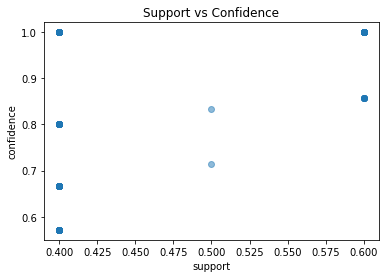

In [93]:
#Support Vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

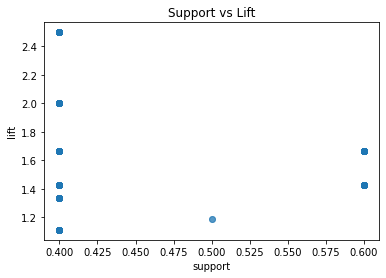

In [94]:
#Support Vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

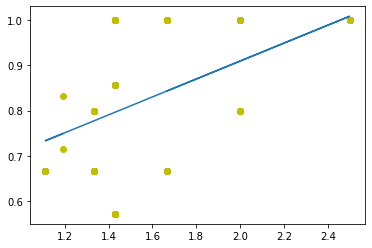

In [95]:
#Lift Vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift'])) 